In [1]:
from dilation import dilation

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def structure_element (size, type):
    if type == 1:
        # square
        kernel = np.ones(size, np.uint8)
        return kernel
    if type == 2:
        # star
        kernel = np.ones(size, np.uint8)
        center = np.uint8((size[0]/2))
        for k in range(0,size[0]):
            kernel[center,k] = 0
            kernel[k,center] = 0
        return kernel
    if type == 3:
        # something 01
        kernel = np.ones(size, np.uint8)
        center = np.uint8((size[0]/2))
        kernel[:,0] = 0
        kernel[center,1] = 0
        return kernel

In [3]:
img = cv2.imread('../../assets/basketball-nba.png', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

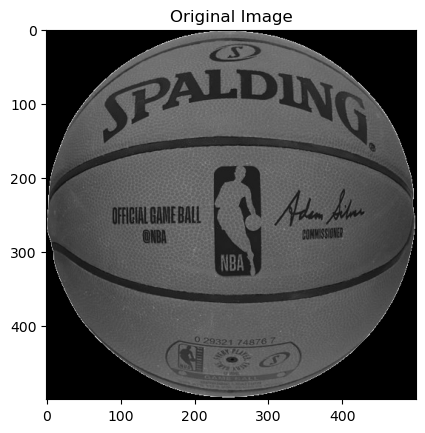

In [4]:
plt.figure(1)
plt.imshow(img_gray, "gray")
plt.title("Original Image")
plt.show()

In [7]:
size = np.array([3, 3])
square = structure_element(size, 1)

img_dilation = dilation(img_gray, square, iterations=2)

img_dilation_cv = cv2.dilate(img_gray, square, iterations=2)

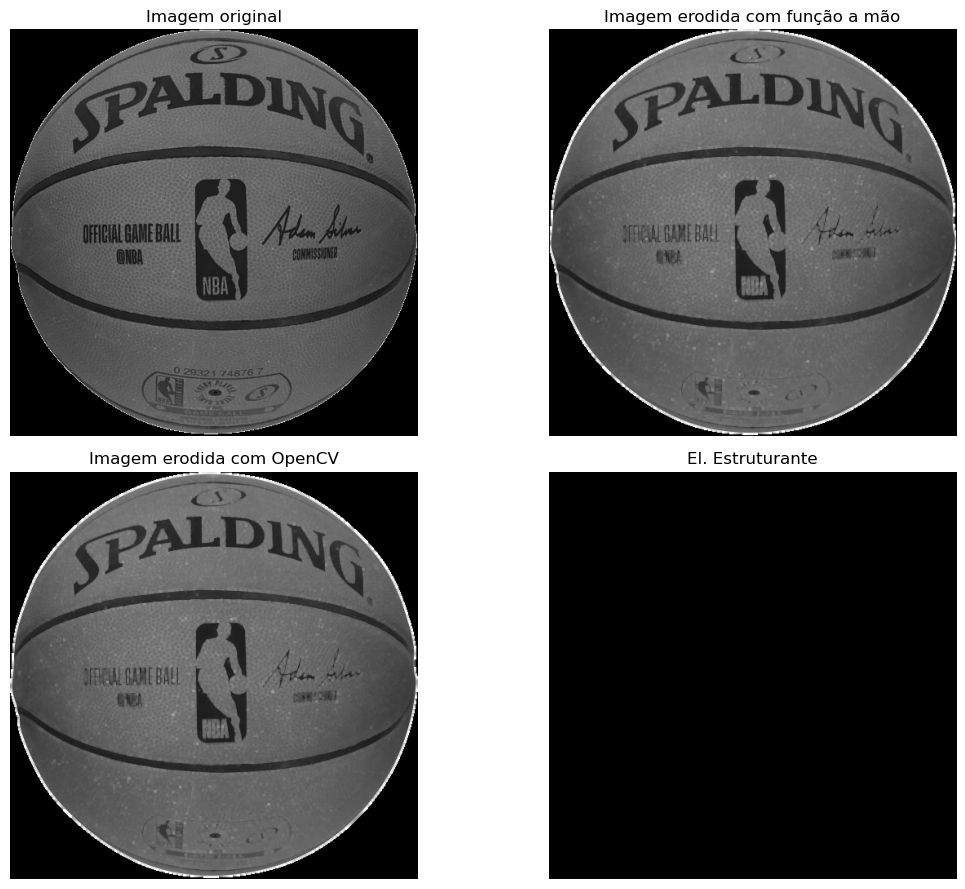

In [8]:
plt.figure(figsize=(12, 9))

plt.subplot(221)
plt.imshow(img_gray, 'gray')
plt.axis("off")
plt.title("Imagem original")

plt.subplot(222)
plt.imshow(img_dilation, 'gray')
plt.axis("off")
plt.title("Imagem erodida com função a mão")

plt.subplot(223)
plt.imshow(img_dilation_cv, 'gray')
plt.axis("off")
plt.title("Imagem erodida com OpenCV")

plt.subplot(224)
plt.imshow(square, 'gray', interpolation='nearest')
plt.axis("off")
plt.grid()
plt.title("El. Estruturante")

plt.tight_layout()
plt.show()